<a href="https://colab.research.google.com/github/DaChelimo/penn-air-software-challenge/blob/main/OpenCV_Shape_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

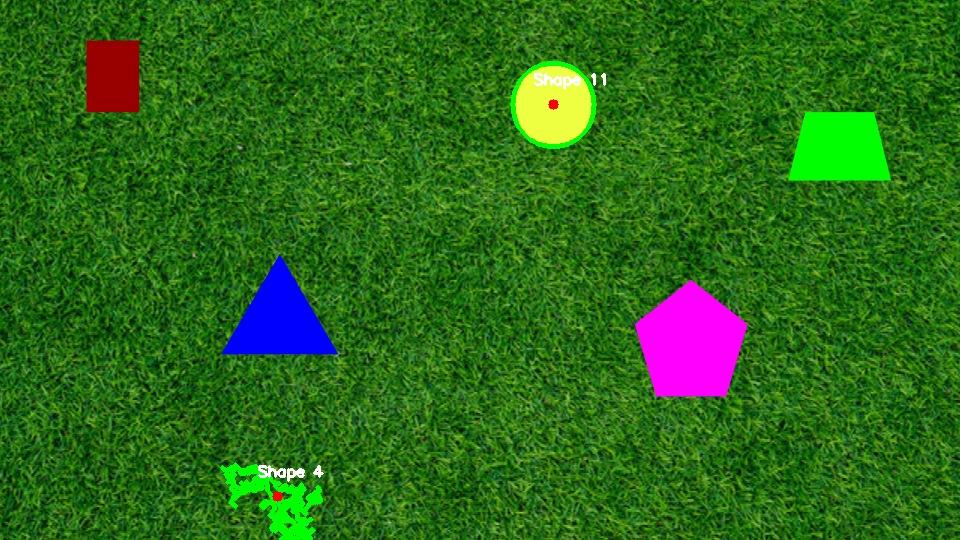

In [26]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


# Load the image
image = cv2.imread('PennAir 2024 App Static.png')
if image is None:
    print("Error: Could not load the image. Please check the file path.")
    exit()

# Duplicate the image so that we can edit the copy instead
outputImage = image.copy()

# Convert image to grayscale to simplify object detection then add blur to make edges more consistent
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurredGrayImage = cv2.GaussianBlur(grayImage, (5, 5), 0)

# Use Canny to detect 'dots' where sharp changes in contrast or brightness happen
# then connect all the dots using findContours
edges = cv2.Canny(blurredGrayImage, 50, 300)
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for i, contour in enumerate(contours):
    # We filter out very small contours, which are usually just noise.
    # The minimum area (e.g., 100) can be adjusted.

    #  Remove noise by filtering out small contouers
    if cv2.contourArea(contour) > 500:
        # Draw on outline, identify the shape's centre and a draw a red circle identifier
        cv2.drawContours(outputImage, [contour], -1, (0, 255, 0), 4)

        shapeMoment = cv2.moments(contour)

        # The centroid is calculated using the moments M.
        if shapeMoment["m00"] != 0:
            cX = int(shapeMoment["m10"] / shapeMoment["m00"])
            cY = int(shapeMoment["m01"] / shapeMoment["m00"])

            cv2.circle(outputImage, (cX, cY), 5, (0, 0, 255), -1) # Dot at centre
            cv2.putText(outputImage, f"Shape {i+1}", (cX - 20, cY - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2) # Name of circle

cv2_imshow(outputImage)
cv2.waitKey(0)
cv2.destroyAllWindows()